<a href="https://colab.research.google.com/github/aasthagarg128/ML_Learn/blob/main/Building_Support_Vector_Machine_Classifier_from_Scratch_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machine Classifier:**

Equation of the Hyperplane:

**y = wx - b**

**Gradient Descent:**

Gradient Desceent is an optimization algorithm used for minimizing the loss function in various machine learning algorithm. It is used for updating the parameters of the learning model.

w=w-L*dw

b=b-L*db


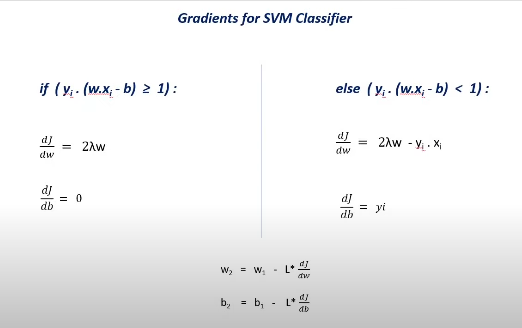


**Learning Rate:**
Learning rate is a tuming parameter in an optimization algorithm that determines the step size at each iteration while movingtowardsa minimumof a loss function




Importing the Dependencies

In [ ]:
# importing the dependencies
import numpy as np

Support Vector Machine Classifier

In [ ]:
class SVM_classifier():

  # initiating the hyperparameter
  def __init__(self,learning_rate,no_of_iterations,lambda_para):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations
    self.lambda_para=lambda_para


  # fitting the dataset to SVM Classifier
  def fit(self,X,Y):

    # m --> number of Data Points --> Number of rows
    # n --> number of input features --> Number of column
    self.m,self.n=X.shape


    #initiating the weight value and bias value
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    # implementing Gradient Descent algoritm for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()


  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label=np.where(self.Y<=0,-1,1)

    # gradients (dw,db  )
    for index,x_i in enumerate(self.X):

      condition = y_label[index]*(np.dot(x_i,self.w)-self.b) >= 1

      if(condition == True):

        dw=2*self.lambda_para*self.w
        db=0
      else:

        dw=2*self.lambda_para*self.w-np.dot(x_i,y_label[index])
        db=y_label[index]


        self.w=self.w-self.learning_rate*dw;
        self.b=self.b-self.learning_rate*db

  # predict the label for a given input value
  def predict(self,X):
    output = np.dot(X,self.w)-self.b

    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1,0,1)

    return y_hat

In [ ]:
# model=SVM_classifier(learning_rate=0.001,no_of_iterations=1000,lambda_para=0.01)

image.png

This condition is

**condition = y_label[index]*(np.dot(x_i,self.w)-self.b) >= 1**

Importing the Dependencies

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# loading the data from csv file to pandas dataframe

diabetes_data = pd.read_csv('/content/diabetes.csv')

In [ ]:
# print the first 5 row of the dataframe
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and columns in the dataset
diabetes_data.shape

(768, 9)

In [ ]:
# getting the statistical measure of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
# separating th features and target

features = diabetes_data.drop(columns='Outcome', axis=1)
target= diabetes_data['Outcome']


In [ ]:
print(features)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(features)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features=standardized_data
target=diabetes_data['Outcome']

In [ ]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=2)

In [ ]:
print(features.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model


Support Vector Machine Classifier

In [ ]:
classifier = SVM_classifier(learning_rate=0.001,no_of_iterations=1000,lambda_para=0.01)

In [ ]:
# training the SVM classifier with training data

classifier.fit(X_train,Y_train)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on the training data

X_train_prediction = classifier.predict(X_train)
training_accuracy_score=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print('Accuracy Score on Training Data:',training_accuracy_score)

Accuracy Score on Training Data: 0.7768729641693811


In [ ]:
# accuracy on testing data

X_test_prediction = classifier.predict(X_test)
test_accuracy_score=accuracy_score(Y_test,X_test_prediction)

In [ ]:
print('Accuracy Score on Testing Data:',test_accuracy_score)

Accuracy Score on Testing Data: 0.7597402597402597


Making Predictive System

In [ ]:
input_data=(5,166,72,19,175,25.8,0.587,51)

# changing the input_data to array
input_data_as_numpy_arr=np.asarray(input_data);

# reshaping the array as we are predicting for 1 instance
input_data_reshaped=input_data_as_numpy_arr.reshape(1,-1)

# standardzing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is Non-Diabetic')
else:
  print('The person is Diabetic')


[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
